In [72]:
# Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html


from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.special import expit
from bisect import bisect_left
from math import fabs
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

BASE_PATH = '/Users/jchjiangcheng/Desktop/processed/' 
PATHS_TO_CSVS = [
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_lucy_vowel_discrimination_task_2023_Apr_13_1623.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Raina_vowel_discrimination_task_2023_Apr_11_1914.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_dai bo_vowel_discrimination_task_2023_Apr_16_2044.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Vicki_vowel_discrimination_task_2023_Apr_14_2309.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Du_vowel_discrimination_task_2023_Apr_13_1547.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Alexandru Suru_vowel_discrimination_task_2023_Apr_10_1829.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Pear_vowel_discrimination_task_2023_Apr_16_2139.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Xinyue Guo_vowel_discrimination_task_2023_Apr_11_1813.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_yuyang ji_vowel_discrimination_task_2023_Apr_16_2112.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_Yumeng Wang_vowel_discrimination_task_2023_Apr_14_1823.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1144.csv',
     f'{BASE_PATH}/RAW/processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1221.csv',
]

PATHS_TO_PROCESSED_CSVS = [
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_lucy_vowel_discrimination_task_2023_Apr_13_1623.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Raina_vowel_discrimination_task_2023_Apr_11_1914.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_dai bo_vowel_discrimination_task_2023_Apr_16_2044.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Vicki_vowel_discrimination_task_2023_Apr_14_2309.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Du_vowel_discrimination_task_2023_Apr_13_1547.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Alexandru Suru_vowel_discrimination_task_2023_Apr_10_1829.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Pear_vowel_discrimination_task_2023_Apr_16_2139.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Xinyue Guo_vowel_discrimination_task_2023_Apr_11_1813.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_yuyang ji_vowel_discrimination_task_2023_Apr_16_2112.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_Yumeng Wang_vowel_discrimination_task_2023_Apr_14_1823.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1144.csv',
 f'{BASE_PATH}/Processed with outliers/processed_processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1221.csv',
] 

PATHS_TO_FIXED_PROCESSED_CSVS = [
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_lucy_vowel_discrimination_task_2023_Apr_13_1623.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Raina_vowel_discrimination_task_2023_Apr_11_1914.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_dai bo_vowel_discrimination_task_2023_Apr_16_2044.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Vicki_vowel_discrimination_task_2023_Apr_14_2309.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Du_vowel_discrimination_task_2023_Apr_13_1547.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Alexandru Suru_vowel_discrimination_task_2023_Apr_10_1829.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Pear_vowel_discrimination_task_2023_Apr_16_2139.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Xinyue Guo_vowel_discrimination_task_2023_Apr_11_1813.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_yuyang ji_vowel_discrimination_task_2023_Apr_16_2112.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_Yumeng Wang_vowel_discrimination_task_2023_Apr_14_1823.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1144.csv',
 f'{BASE_PATH}/fixed with outliers/fixed_processed_processed_Chiheng_Jiang_liam_vowel_discrimination_task_2023_May_15_1221.csv',
                                ]

PATHS_TO_CLEAN_CSVS = [f'{BASE_PATH}/Cleaned data/pilot with stimulation/004.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/004s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/007.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/007s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/008.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/008s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/009.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/009s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/011.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/011s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/012.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/012s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/014.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/014s.csv']

PATHS_TO_SERIOUS_CLEAN_CSVS = [
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/004.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/004s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/001.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/001s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/002.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/002s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/003.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/003s.csv',                               
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/007.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/007s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/008.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/008s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/009.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/009s.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/011.csv',
                       f'{BASE_PATH}/Cleaned data/pilot with stimulation/011s.csv'
                       ]
PATHS_TO_SERIOUS_CLEAN_CSVS_NORMAL, PATHS_TO_SERIOUS_CLEAN_CSVS_STIMULATED = ([path for path in PATHS_TO_SERIOUS_CLEAN_CSVS 
                                                                              if "s" not in path.split("/")[-1].split(".")[0]], [
    path for path in PATHS_TO_SERIOUS_CLEAN_CSVS if "s" in path.split("/")[-1].split(".")[0]
])


In [73]:
new_dfs = defaultdict(dict)
for path_to_csv in PATHS_TO_CSVS:
    s = path_to_csv.split("/")
    name = s[-1].split('_')[3]
    df = pd.read_csv(path_to_csv)
    RT, code, F1, Session, ID = [], [], [], [], [] 
    for sess in range(1, 4):
        num = len(df[f"session_{sess}_f1_value"])
        RT.extend(df[f"session_{sess}_response_time"])
        code.extend(df[f"session_{sess}_response_code"])
        F1.extend(df[f"session_{sess}_f1_value"])
        Session.extend([sess] * num)
        ID.extend([name] * num)
        
    new_df = {}
    new_df["ID"] = ID
    new_df["RT"] = RT
    new_df["code"] = code
    new_df["F1"] = F1
    new_df["Session"] = Session    
    new_df = pd.DataFrame(data=new_df)
    new_path = '/'.join(s[:-2]) + '/Processed with outliers/processed_' + s[-1]
    new_df.to_csv(new_path, index=False)

In [74]:
for path_to_csv in PATHS_TO_PROCESSED_CSVS:
    df = pd.read_csv(path_to_csv)
    df = df[df["RT"] > 0]
    df = df[df["code"] != 'None']
    s = path_to_csv.split('/')
    new_path = '/'.join(s[:-1]) + '/fixed_' + s[-1]
    df.to_csv(new_path, index=False)

In [75]:
new_df = []
for path_to_csv in PATHS_TO_FIXED_PROCESSED_CSVS:
    df = pd.read_csv(path_to_csv)
    new_df.append(df)
new_df = pd.concat(new_df)
new_df.to_csv(BASE_PATH + 'all_fixed_processed.csv', index=False)

In [76]:
def get_stats(df):
    xs, ys = list(df["F1"]), list(df["code"])
    merged = sorted([(xs[i], ys[i]) for i in range(len(xs))], key=lambda t: t[0])
    xs, ys = np.array([t[0] for t in merged]), np.array([t[1] for t in merged])

    xs = xs.reshape(-1, 1)
    clf = LogisticRegression()
    clf.fit(xs, ys)
    loss = expit(xs * clf.coef_ + clf.intercept_).ravel()
    boundary = xs[bisect_left(loss, 0.5)-1][0] 
    return xs, ys, loss, clf, boundary
    
def plot_aggregated_sessions(path_to_csvs, legend, title=None):
    if not isinstance(path_to_csvs, list):
        path_to_csvs = [path_to_csvs]
    XS, YS, LOSSES, CLFS, BOUNDARIES = [], [], [], [], []
    for path_to_csv in path_to_csvs:
        df = pd.read_csv(path_to_csv)
        title = title if title is not None else df["ID"].iloc[0]
        xs, ys, loss, clf, boundary = get_stats(df)
        LOSSES.append(loss)
        XS.append(xs)
        YS.append(ys)
        CLFS.append(clf)
        BOUNDARIES.append(boundary)
        
    for i in range(len(BOUNDARIES)):
        print(f'For {legend[i][1]} the decision boundary is at {BOUNDARIES[i]}')
        
    COLOURS = [t[0] for t in legend]
    sns.set(rc={'figure.figsize':(15, 10)})
    for i in range(len(XS)):
        ax = plt.axvline(BOUNDARIES[i], color=COLOURS[i])
        ax = sns.regplot(x=XS[i], y=LOSSES[i],
                 color=COLOURS[i], label=legend[i][1],
            logistic=True, truncate=False, line_kws={'linewidth':0.2})
        ax = sns.regplot(x=XS[i], y=YS[i],
                 color=COLOURS[i],
            logistic=True, truncate=False)
    ax.set(xlabel="f1 value", ylabel="response code")
    plt.legend()
    plt.title(title)
    plt.show()
    
def plot_per_session(path_to_csvs, legend, title=None):
    if not isinstance(path_to_csvs, list):
        path_to_csvs = [path_to_csvs]
    for path_to_csv in path_to_csvs:
        XS, YS, LOSSES, CLFS, BOUNDARIES = [], [], [], [], []
        df = pd.read_csv(path_to_csv)
        for session in [1,2,3]:
            sdf = df[df["Session"] == session]
            xs, ys, loss, clf, boundary = get_stats(sdf)
            LOSSES.append(loss)
            XS.append(xs)
            YS.append(ys)
            CLFS.append(clf)
            BOUNDARIES.append(boundary)
            
            COLOURS = [t[0] for t in legend]
            sns.set(rc={'figure.figsize':(15, 10)})
            ax = plt.axvline(boundary, color=COLOURS[session-1])
            ax = sns.regplot(x=xs, y=loss,
                     color=COLOURS[session-1], label=legend[session-1][1],
                logistic=True, truncate=False, line_kws={'linewidth':0.2})
            ax = sns.regplot(x=xs, y=ys,
                 color=COLOURS[session-1],
            logistic=True, truncate=False)
        ax.set(xlabel="f1 value", ylabel="response code")
        plt.legend()
        plt.title(title)
        plt.show()
        
        for i in range(len(BOUNDARIES)):
            print(f'For session {i+1} the decision boundary is at {BOUNDARIES[i]}')

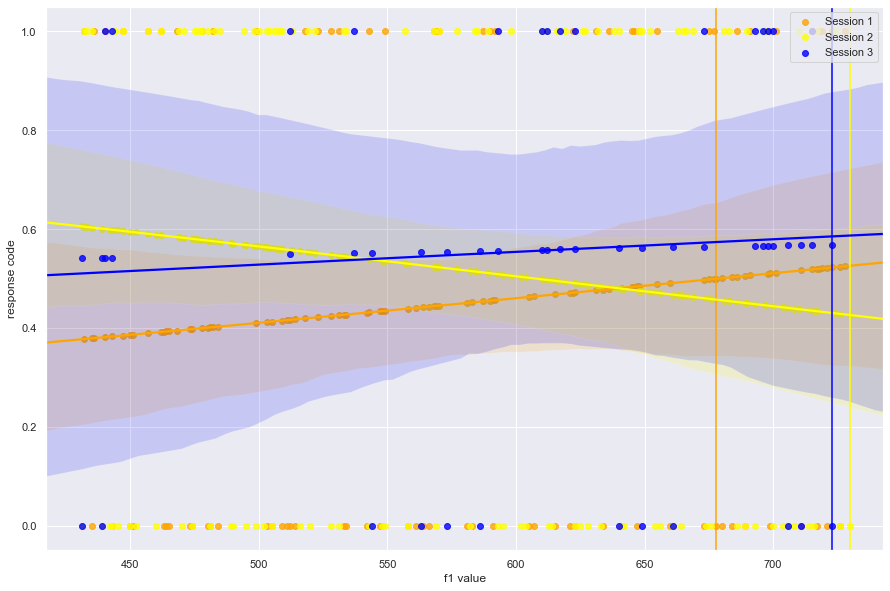

For session 1 the decision boundary is at 678
For session 2 the decision boundary is at 730
For session 3 the decision boundary is at 723


In [79]:
plot_per_session(PATHS_TO_CLEAN_CSVS[13], legend=[('orange', 'Session 1'),
                                                 ('yellow', 'Session 2'),
                                                 ('blue', 'Session 3'),])

For not stimulated the decision boundary is at 565
For stimulated the decision boundary is at 565


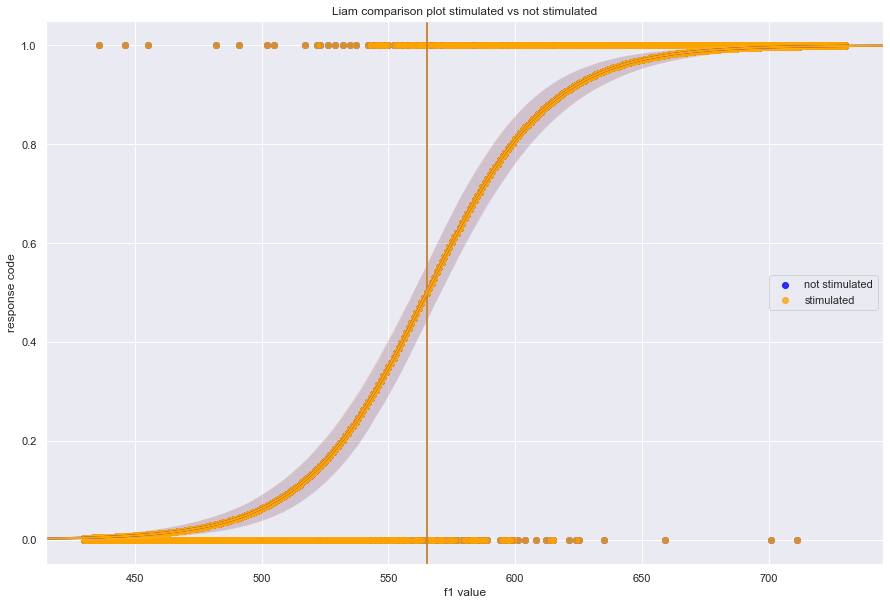

In [35]:
plot_aggregated_sessions(
 ['/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/012.csv',
  '/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/012s.csv'],
    legend=[('blue', 'not stimulated'), ('orange', 'stimulated')], title="Liam comparison plot stimulated vs not stimulated"
    )

For not stimulated the decision boundary is at 565
For stimulated the decision boundary is at 569


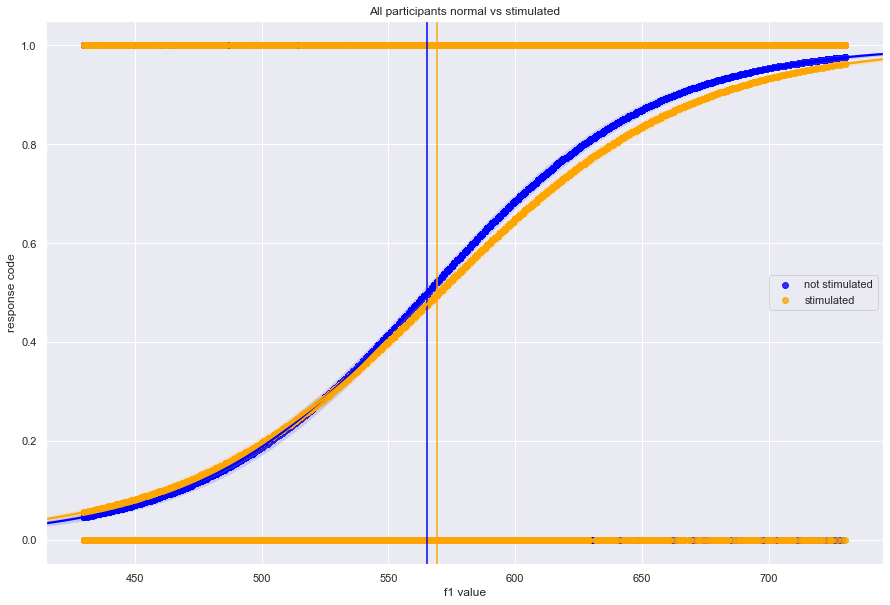

In [51]:
df_normal = pd.concat(pd.read_csv(path) for path in PATHS_TO_SERIOUS_CLEAN_CSVS_NORMAL)
df_stimulated = pd.concat(pd.read_csv(path) for path in PATHS_TO_SERIOUS_CLEAN_CSVS_STIMULATED)
df_normal.to_csv('/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/all_serious_normal.csv')
df_stimulated.to_csv('/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/all_serious_stimulated.csv')
plot_aggregated_sessions([
  '/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/all_serious_normal.csv',  
  '/Users/jchjiangcheng/Desktop/processed/Cleaned data/pilot with stimulation/all_serious_stimulated.csv',
],
    legend=[('blue', 'not stimulated'), ('orange', 'stimulated')], title="All participants normal vs stimulated"
    )